In [18]:
using QuantumOptics
using Plots

# Introduction to quantum optics


### Brief recap of the harmonic oscillator

The harmonic oscillator is described by the Schrödinger equation:

$$ \hat{H}\Psi = E\Psi $$

where $\hat{H}$ is the Hamiltonian operator, $\Psi$ is the wavefunction, and $E$ is the energy eigenvalue. For a one-dimensional quantum harmonic oscillator, the Hamiltonian is given by:

$$ \hat{H} = -\frac{\hbar^2}{2m}\frac{d^2}{dx^2} + \frac{1}{2}m\omega^2x^2 $$

The first term represents the kinetic energy operator and the second term is the potential energy operator. Solving the Schrödinger equation for the quantum harmonic oscillator can be achieved using a series solution method, or via operator methods.

$$ \hat{a} = \sqrt{\frac{m\omega}{2\hbar}}\left(\hat{x} + \frac{i\hat{p}}{m\omega}\right) $$

$$ \hat{a}^{\dagger} = \sqrt{\frac{m\omega}{2\hbar}}\left(\hat{x} - \frac{i\hat{p}}{m\omega}\right) $$

where $\hat{x}$ and $\hat{p}$ are position and momentum operators, respectively.

The Hamiltonian can then be expressed in terms of these operators:

$$ \hat{H} = \hbar\omega\left(\underbrace{\hat{a}^{\dagger}\hat{a}}_{\hat N} + \frac{1}{2}\right) $$

Using these operators, we can define ladder operations that allow us to calculate the energy levels and corresponding wavefunctions of the system.

The energy eigenvalues are given by:

$$ E_n = \hbar\omega\left(n + \frac{1}{2}\right) $$

for $n = 0, 1, 2, \ldots$. This shows the energy levels of the quantum harmonic oscillator are quantized, and evenly spaced.

The wavefunctions for each energy level can be obtained by applying the lowering and raising operators to the ground state wavefunction $\Psi_0$:

$$ \Psi_n =

 \frac{1}{\sqrt{n!}}\left(\hat{a}^{\dagger}\right)^n \Psi_0 $$

where $\Psi_0$ is the ground state wavefunction:

$$ \Psi_0 = \left(\frac{m\omega}{\pi\hbar}\right)^{1/4}e^{-m\omega x^2/2\hbar} $$


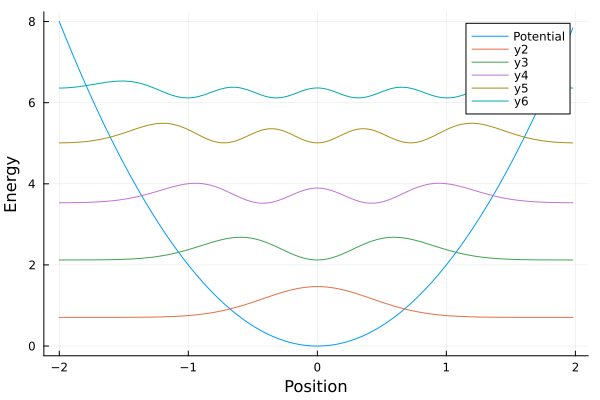

In [17]:
basis = PositionBasis(-2, 2, 200)
x = position(basis)
p = momentum(basis)
H = p^2/4 + 2*DenseOperator(x^2)
energies, states = eigenstates((H+dagger(H))/2, 5)
xpoints = samplepoints(basis)
p1 = plot(xpoints, 2*xpoints.^2, xlabel="Position", ylabel="Energy", label="Potential")
for i=1:length(states)
    plot!(p1, xpoints, abs2.(states[i].data).*40 .+ energies[i])
end
p1

The time evolution is given something like:

┌ Info: Saved animation to /tmp/jl_cdGfaBonin.gif
└ @ Plots /home/jose/.julia/packages/Plots/io9zQ/src/animation.jl:156


Plots.AnimatedGif("/tmp/jl_cdGfaBonin.gif")
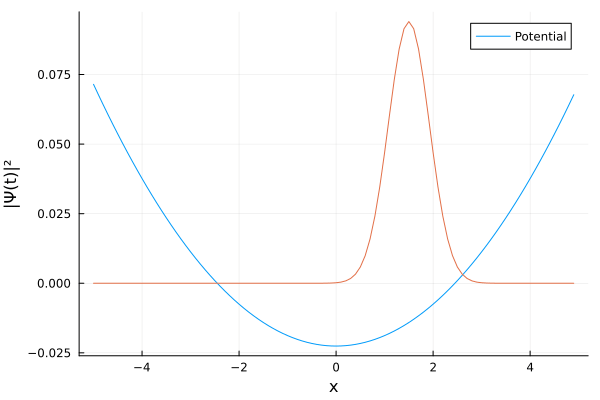

In [24]:
m = 1.
ω = 0.5 
xmin = -5
xmax = 5
Npoints = 100
b_position = PositionBasis(xmin, xmax, Npoints)
p = momentum(b_position)
x = position(b_position)
H = p^2/2m + 1/2*m*ω^2*dense(x^2)
b_momentum = MomentumBasis(b_position);

p = momentum(b_momentum)
x = position(b_momentum)

H = dense(p^2)/2m + 1/2*m*ω^2*x^2
T_px = transform(b_momentum, b_position)

T_xp = dagger(T_px)

x = position(b_position)
p = momentum(b_momentum)

H_kin = LazyProduct(T_xp, p^2/2m, T_px)
V = ω*x^2
H = LazySum(H_kin, V)
# Initial state
x0 = 1.5
p0 = 0
sigma0 = 0.6
Ψ0 = gaussianstate(b_position, x0, p0, sigma0);

# Time evolution
T = [0:0.05:6;]
tout, Ψt = timeevolution.schroedinger(T, Ψ0, H);

# Plot dynamics of particle density
x_points = samplepoints(b_position)

n = abs.(Ψ0.data).^2
V = ω*x_points.^2
C = maximum(V)/maximum(n)


@gif for i=1:length(T)
    p1 = plot(x_points, (V.-3)./C, xlabel="x", ylabel="|Ψ(t)|²", label="Potential")
    Ψ = Ψt[i]
    n .= abs.(Ψ.data).^2
    plot!(x_points, n, label="")
end


### Brief recap about the density matrix

The density matrix is a useful tool for describing the state of a quantum system. It is a matrix representation of the state of a quantum system, and can be used to calculate the expectation value of any observable. The density matrix is defined as:

$$ \rho = \sum_i p_i \left|\psi_i\right\rangle\left\langle\psi_i\right| $$

where $p_i$ is the probability of the system being in state $\left|\psi_i\right\rangle$. The density matrix is Hermitian, and has unit trace. The diagonal elements of the density matrix are the probabilities of the system being in the corresponding state, and the off-diagonal elements are the coherences between the states. Thus, it allows us to inspect if a system is in a pure state or a mixed state: 

- Pure state: $\rho^2 = \rho$
- Mixed state: $\rho^2 \neq \rho$

Some useful properties of the density matrix:

- The trace of the density matrix is equal to 1: $\mathrm{Tr}(\rho) = 1$
- It is Hermitian: $\rho = \rho^{\dagger}$
- It is positive semi-definite: $\bra{\psi}\rho\ket{\psi} \geq 0$

## The case for Mixed states

We have seen several times that knowing a priori the state of a system is not always possible, specially experimentally. So, for example in a experiment we will not be exactly sure we have prepared a single $\Psi$ state, but we  will know we have a mixture of states:

$$\{
    \Psi_m, w_m
    \}, \quad \sum_m w_m = 1, \quad w_m \geq 0
$$

This means that $w_m$ is the probability of having the state $\Psi_m$. The expectation value of an operator $\hat A$ is then given by:

$$
\langle \hat A \rangle = \sum_m w_m \langle \Psi_m | \hat A | \Psi_m \rangle = \text{Tr}(\sum_m w_m \underbrace{| \Psi_m \rangle \langle \Psi_m |}_{\rho_m} \hat A)
$$

Using this formalism, we can write for example any full state as a mixture of states weighted by the probability of having that state and a set of basis vectors $|b_m \rangle$:

$$
\ket{\Psi} = \sum_m \sqrt{w_m} \ket{\Psi_m} \otimes \ket{b_m}
$$

which takes us to the next section, the Schmidt decomposition.

### Schmidt decomposition

According to the Schmidt decomposition theorem, any state $|\psi\rangle$ in $H_A \otimes H_B$ can be written as:

\begin{equation}
|\psi\rangle = \sum_{i=1}^{r} \sqrt{\lambda_i} |a_i\rangle |b_i\rangle,
\end{equation}

#### Proof

Let's provide a sketch of the proof of the Schmidt Decomposition.

Consider a bipartite state $|\psi\rangle \in H_A \otimes H_B$ which we write generally as:

\begin{equation}
|\psi\rangle = \sum_{i,j} c_{ij} |a_i\rangle |b_j\rangle,
\end{equation}

where $|a_i\rangle$ and $|b_j\rangle$ are bases for $H_A$ and $H_B$, respectively, and $c_{ij}$ are complex coefficients.

We define a matrix $C$ with elements $C_{ij} = c_{ij}$ and perform a singular value decomposition (SVD) on it. As the SVD is always possible, we can write:

\begin{equation}
C = U \Lambda V^\dagger,
\end{equation}

where $U$ and $V$ are unitary matrices (so $U^\dagger U = V^\dagger V = I$) and $\Lambda$ is a diagonal matrix with non-negative real numbers on the diagonal.

We can interpret the action of $U$ and $V$ as a change of basis in $H_A$ and $H_B$, respectively. If we insert the SVD of $C$ back into the general expression for $|\psi\rangle$, we obtain the Schmidt decomposition.

Note that the Schmidt decomposition is not only valid for pure states but also for mixed states if we interpret $\lambda_i$ as the eigenvalues of the reduced density matrices.

The Schmidt decomposition is a powerful tool in quantum information theory. It's used to quantify entanglement, to simplify calculations, and to prove various theorems. The number of non-zero Schmidt coefficients (the Schmidt rank) is an invariant under local unitary transformations, and it provides a measure of the amount of entanglement in the state.